In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go

In [61]:
data=pd.read_excel("D:\DCS\SEM-6\Data Mining Lab\Sales Data Set\Adidas US Sales Datasets.xlsx")

<>:1: SyntaxWarning:

invalid escape sequence '\D'

<>:1: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\vishwa\AppData\Local\Temp\ipykernel_14140\3553416772.py:1: SyntaxWarning:

invalid escape sequence '\D'



In [62]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [64]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Retailer ID,9648.0,1173849.72357,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0,26360.377309
Invoice Date,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
Units Sold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
Total Sales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
Operating Profit,9648.0,34425.244761,0.0,1921.7525,4371.42,52062.5,390000.0,54193.113713
Operating Margin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


In [65]:
data.shape

(9648, 13)

In [66]:
duplicated_rows_mask = data.duplicated()

print("Duplicated Rows (True/False):")
print(duplicated_rows_mask)

Duplicated Rows (True/False):
0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool


In [67]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [68]:
data['Total Sales'] = pd.to_numeric(data['Total Sales'])
data['Operating Margin'] = pd.to_numeric(data['Operating Margin'])
data['Operating Profit'] = pd.to_numeric(data['Operating Profit'])
data['Units Sold'] = pd.to_numeric(data['Units Sold'])
data['year'] = pd.to_datetime(data['Invoice Date']).dt.year
data['month'] = pd.to_datetime(data['Invoice Date']).dt.month
data['day'] = pd.to_datetime(data['Invoice Date']).dt.day

In [69]:
Total_revenue=data['Total Sales'].sum()
print("Total Revenue:",Total_revenue)

Total Revenue: 899902125.0


In [70]:
Total_sales=data['Units Sold'].sum()
print("Total Sales:",Total_sales)

Total Sales: 2478861


In [71]:
total_revenue = data['Total Sales'].sum()
number_of_periods = data.shape[0]
average_revenue = total_revenue / number_of_periods

print(f"Average Revenue: {average_revenue}")

Average Revenue: 93273.4375


In [72]:
rev_year=data.groupby('year')['Total Sales'].sum()
print("Revenue of each year:"
      ,rev_year)

Revenue of each year: year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


In [73]:
avg_profit_margin=data['Operating Margin'].mean()
print("Average Profit Margin:",avg_profit_margin)

Average Profit Margin: 0.42299129353233833


In [74]:
print("The Maximun Selling Price is:",data['Total Sales'].max().round(2),"USD")

The Maximun Selling Price is: 825000.0 USD


Correlation

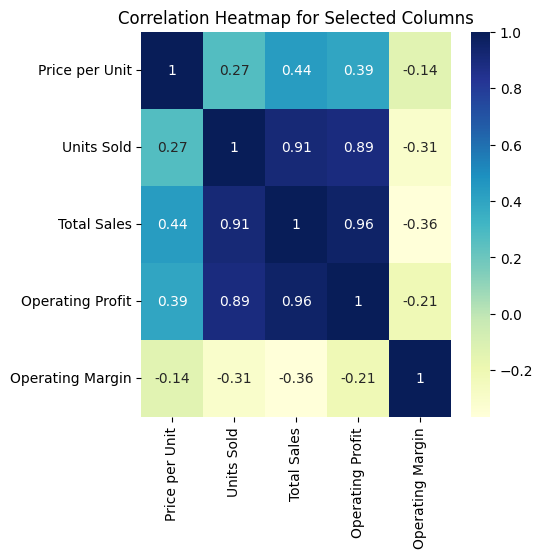

In [75]:
#Correlation Analysis
data_subset = data[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']].astype(float)
corr_matrix = data_subset.corr()

styled_corr_matrix = corr_matrix.style.background_gradient(cmap='Blues')
styled_corr_matrix

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

Total Sales correlation value with Operating Profit = 0.96

Total Sales correlation value with Units Sold = 0.91

Total Sales correlation value with Price per Unit = 0.44

Freqency of Retailer

In [76]:
#Freqency of Retailer
retailer_counts = data['Retailer'].value_counts()

bar_trace = go.Bar(
    x=retailer_counts.index,
    y=retailer_counts.values,
    marker=dict(color='yellow')  
)

fig = go.Figure(bar_trace)

fig.update_layout(
    title='Frequency of Retailer',
    xaxis_title='Retailer',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=90),  
    width=600,  
    height=400,  
)

fig.show()

Frequency of Region

In [77]:
#Frequency of the Region
retailer_counts = data['Region'].value_counts()

bar_trace = go.Bar(
    x=retailer_counts.index,
    y=retailer_counts.values,
    marker=dict(color='green')  
)

fig = go.Figure(bar_trace)

fig.update_layout(
    title='Frequency of Region',
    xaxis_title='Region',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=90),  
    width=600,  
    height=400,  
)

fig.show()

Frequency of State

In [78]:
#Frequency of State 
sales_method_counts = data['State'].value_counts()

bar_trace = go.Bar(
    y=sales_method_counts.index,  
    x=sales_method_counts.values,
    orientation='h',  
    marker=dict(color='violet')
)

fig = go.Figure(bar_trace)

fig.update_layout(
    title='Frequency of State',
    yaxis_title='State',  
    xaxis_title='Frequency',
    width=600,
    height=400,
)

fig.show()

In [79]:
#Frequency of City
sales_method_counts = data['City'].value_counts()

bar_trace = go.Bar(
    y=sales_method_counts.index,  
    x=sales_method_counts.values,
    orientation='h',  
    marker=dict(color='violet')
)

fig = go.Figure(bar_trace)

fig.update_layout(
    title='Frequency of City',
    yaxis_title='City',  
    xaxis_title='Frequency',
    width=600,
    height=400,
)

fig.show()

In [80]:
#Freqency of Sales Method
retailer_counts = data['Sales Method'].value_counts()

bar_trace = go.Bar(
    x=retailer_counts.index,
    y=retailer_counts.values,
    marker=dict(color='pink')  
)

fig = go.Figure(bar_trace)

fig.update_layout(
    title='Frequency of Sales Method',
    xaxis_title='Sales Method',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=90),  
    width=600,  
    height=400,  
)

fig.show()

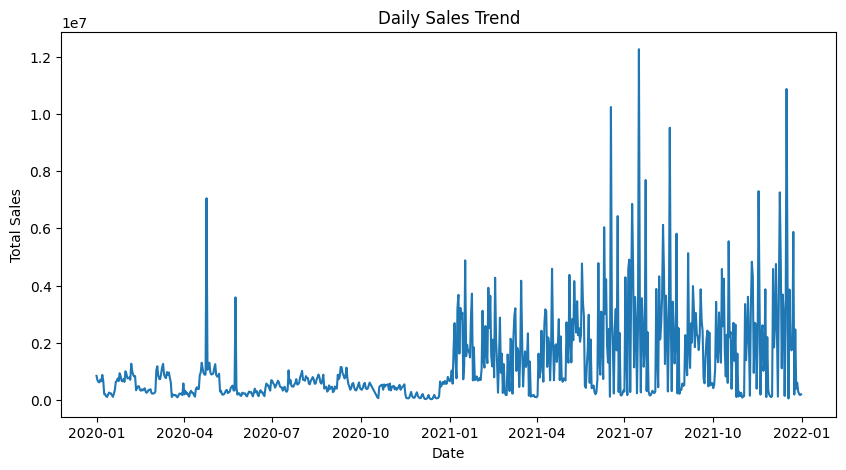

In [81]:
daily_sales = data.groupby('Invoice Date')['Total Sales'].sum()

# line plot
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values)

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')

plt.show()

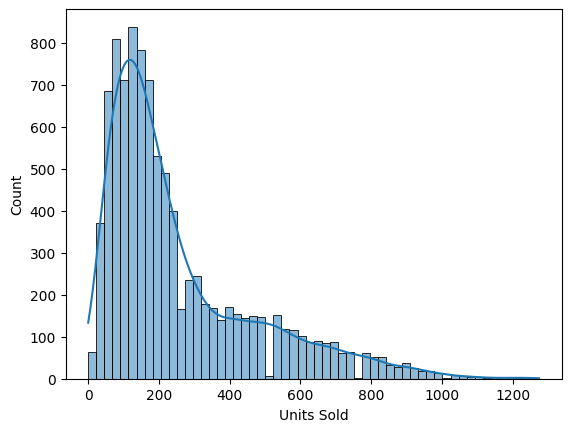

In [82]:
sns.histplot(data = data, x = 'Units Sold', kde=True)
plt.show()

The Unit Sold in Right Skewed and the maximum ranges between 0-250

In [83]:
#Top selling Product
top_selling_products = data.groupby('Product')['Total Sales'].sum().reset_index()
top_selling_products.index += 1  

fig = px.bar(top_selling_products, x='Total Sales', y='Product', orientation='h')

fig.update_layout(
    title='Top Selling Products',
    xaxis_title='Total Sales',
    yaxis_title='Product Names',
    font=dict(size=16),
    yaxis=dict(tickfont=dict(size=16)),
    width=800,
    height=400
)

fig.show()

The top selling category is Men's Street Footwear, followed by Men's Athletic Footwear.

In [88]:
# Top Units Sold
top_selling_products = data.groupby('Product')['Units Sold'].sum().reset_index()
top_selling_products.index += 1  

fig = px.bar(top_selling_products, x='Units Sold', y='Product', orientation='h')

fig.update_layout(
    title='Top Units Sold',
    xaxis_title='Units Sold',
    yaxis_title='Product Names',
    font=dict(size=16),
    yaxis=dict(tickfont=dict(size=16)),
    width=800,
    height=400
)

fig.show()

In [ ]:
#Operating Profit By Region
region_profit = data.groupby('Region')['Operating Profit'].sum().reset_index().sort_values('Operating Profit', ascending=False)

pie_trace = go.Pie(
    labels=region_profit['Region'],
    values=region_profit['Operating Profit'],
    hole=0.3,
    pull=[0.1, 0, 0, 0, 0]  
)

fig = go.Figure(data=[pie_trace])

fig.update_layout(
    title='Operating Profit by Region',
    showlegend=False,
    width=500,
    height=500,
)

fig.show()

In [ ]:
#Operating Profit By Product
region_profit = data.groupby('Product')['Operating Profit'].sum().reset_index().sort_values('Operating Profit', ascending=False)

pie_trace = go.Pie(
    labels=region_profit['Product'],
    values=region_profit['Operating Profit'],
    hole=0.3,
    pull=[0.1, 0, 0, 0, 0]  
)

fig = go.Figure(data=[pie_trace])

fig.update_layout(
    title='Operating Profit by Product',
    showlegend=False,
    width=500,
    height=500,
)

fig.show()

In [ ]:
#Operating Profit By Sales Method
region_profit = data.groupby('Sales Method')['Operating Profit'].sum().reset_index().sort_values('Operating Profit', ascending=False)

pie_trace = go.Pie(
    labels=region_profit['Sales Method'],
    values=region_profit['Operating Profit'],
    hole=0.3,
    pull=[0.1, 0, 0, 0, 0]  
)

fig = go.Figure(data=[pie_trace])

fig.update_layout(
    title='Operating Profit by Method',
    showlegend=False,
    width=500,
    height=500,
)

fig.show()

In [ ]:
#Operating Profit by State
state = data[['State', 'Operating Profit']].groupby('State').sum().reset_index().sort_values('Operating Profit', ascending=True).iloc[:10,:]

colors = ['#864879','#2D4263','#C84B31', '#ECDBBA', '#B3541E', '#4879A8', '#1E4E79', '#8F9D6A', '#C3D59E', '#D3C0B7']

bar_trace = go.Bar(
    x=state['Operating Profit'],
    y=state['State'],
    orientation='h',  
    marker=dict(color=colors)  
)

fig = go.Figure(data=[bar_trace])

fig.update_layout(
    title='Top 10 States by Operating Profit',
    xaxis_title='Operating Profit',
    yaxis_title='State',
    width=800,
    height=500,
)

fig.show()

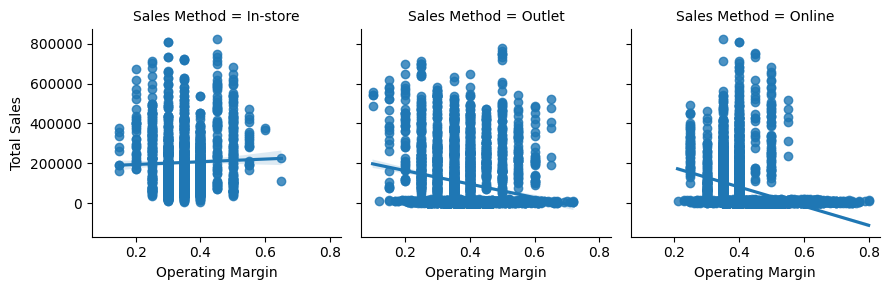

In [ ]:
#Operating Margin,Sales Method, Total Sales
sns.lmplot(data = data, x ='Operating Margin',y = 'Total Sales',col ='Sales Method',height=3)